In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Pivot Tables
This is a notebook that demonstrates and explains the use of the Pandas `pivot_table()` function. 

The function is set up to mimic the behavior of the Excel function of the same name. It would be called a crosstab in SPSS. 

First, we read in the data and get an idea of what the dataset looks like.

In [2]:
df = pd.read_csv('/Users/michaelreinhardme.com/ds/nlp_practice/titanic-1/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Then we get rid of the non-numeric data. We get rid of PassengerId because, although it is a number, we are not using it as a number but as an identifier. In other words, passenger 6 is not 2 times passenger 3. 

We give it a list of the columns (axis 1) that we need to drop. If we were only dropping one column we would give it a string without the list syntax.

In [3]:
df.drop(['PassengerId','Ticket','Name'], inplace=True, axis=1)

### A Single Index
Since the data is in a pandas dataframe we make use of the index: a feature that allows you to group your data. We use the `pd.pivot_table()` function. We assign the DataFrame to the parameter `data` and use 'Sex' as the index. Note that even though we are only using one column as the index we give the index feature a list containing that one column's name, 'Sex'. The index parameter takes in a list even if it is only one variable.

In [4]:
table = pd.pivot_table(data=df, index=['Sex'])
table

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,27.915709,44.479818,0.649682,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,2.389948,0.429809,0.188908


The default aggregation function is to take the mean so variable that are coded 0, 1, such as not-survived, survived, can be interpreted proportions or, by multiplying by 100, as percentages. That is why the binary variable don't really show up on this graph. 

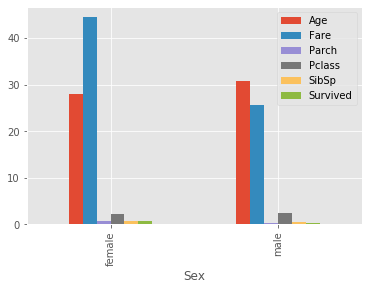

In [5]:
table.plot(kind='bar')

You can create a multi-index. The index variables are rows and all of the variables not in the index are presented in columns representing the sub-totals for those groups. So the first row represents the averages for the females that were in first class. 

In [6]:
table = pd.pivot_table(data=df, index=['Sex','Pclass'])
table

Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       34.611765  106.125798  0.457447  0.553191  0.968085
       2       28.722973   21.970121  0.605263  0.486842  0.921053
       3       21.750000   16.118810  0.798611  0.895833  0.500000
male   1       41.281386   67.226127  0.278689  0.311475  0.368852
       2       30.740707   19.741782  0.222222  0.342593  0.157407
       3       26.507589   12.661633  0.224784  0.498559  0.135447

### Aggregation
Different aggregation functions are also possible. The default is `np.mean()` but you can switch it to whatever you want by using the aggfunc parameter. You pass a dictionary to `aggfunc` that has for the keys the variable names, and for the values has the desired numpy function. 

The function will return only the variables assigned an aggregation function. 

In [7]:
table = pd.pivot_table(data=df, index=['Sex','Pclass'], aggfunc={'Age': np.mean, 'Survived': np.sum})
table

Age  Survived
Sex    Pclass                     
female 1       34.611765        91
       2       28.722973        70
       3       21.750000        72
male   1       41.281386        45
       2       30.740707        17
       3       26.507589        47

### Crosstabs
What if, instead of a multi-index, you wanted to present the data on subcategories as a crosstabulation? Then instead of giving both of the variables that define the subcategories as a list to the index parameter you supply one varable name to the index and the other to the `columns` (note that the `columns` parameter is plural even though we are giving it only one variable). Then each cell of the resulting table is defined by the values of the index and column. So cell 1, 1 (first row, first column) is the number of females in first class that survived. 

In [8]:
table = pd.pivot_table(data=df, index=['Sex'], columns=['Pclass'], aggfunc={'Survived': np.sum})
table

Survived        
Pclass        1   2   3
Sex                    
female       91  70  72
male         45  17  47

Now this table shows the mean of survival by the same two categorical variables used above. 

In [11]:
table = pd.pivot_table(data=df, index=['Sex'], columns=['Pclass'], aggfunc={'Survived': np.mean})
table

Survived                    
Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

I want to clean it up by limiting the values to the first two digits. I have tried to us the `round()` function, but it doesn't work. 

In [14]:
# table = pd.pivot_table(data=df, index=['Sex'], columns=['Pclass'], aggfunc={'Survived': np.mean})
# table

The optional `values` parameter lets you specify the variable inside the cell. Note that the `aggfunc` here is not given a dictionary but just the numpy function. This means that it will automatically apply that function to the whole table, which would include all of the variables in the `DataFrame` if we didn't limit it with the `values` parameter.

In [21]:
table = pd.pivot_table(data=df, index='Sex', columns='Pclass', values='Survived', aggfunc=np.mean)
table

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


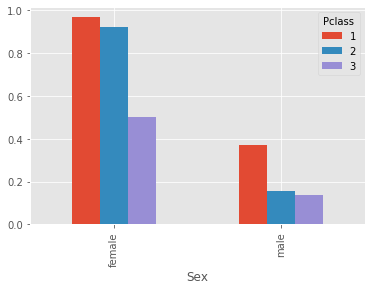

In [22]:
table.plot(kind='bar')

Note that if we had created the table with a multi-index instead of a crosstab we would get this kind of graph:

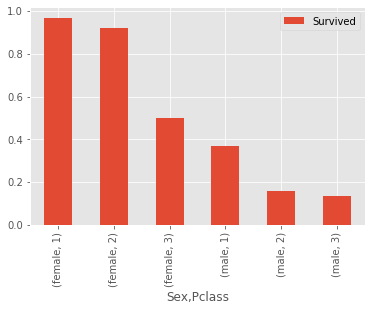

In [24]:
table = pd.pivot_table(data=df, index=['Sex','Pclass'], values='Survived', aggfunc=np.mean)
table.plot(kind='bar')

In [ ]:
#different agg functions
table = pd.pivot_table(data)